# Calculo de las metricas de un json

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

### Lectura del documento

In [2]:
# Ruta del archivo con los datos obtenidos por el "Tracking system"
file_path = './RESULT.json'

In [3]:
# Abrir el archivo json y cargarlo en la variable data
with open(file_path) as f:
    data = json.load(f)

# Se ordena la información del documento en base el timestamp
sorted_data = sorted(data, key=lambda x: x['timestamp'])

In [4]:
# Numero total de eventos
num_events = len(sorted_data)
# Indice de eventos
index = 0
sessions = []
sesion = 0
test_list = []
test = 0
pos_list = []


In [5]:
def parseEvent(event):
    global test_list
    global pos_list
    global sesion
    global test
    global sessions
    if event['typeEvent'] == "LoginEvent":
        test = 0
        print("\nInicio de sesion: ", sesion)
    elif event['typeEvent'] == "LogoutEvent":
        sessions.append(test_list.copy())
        test_list.clear()
        print("\nFin de sesion: ", sesion)
        sesion += 1
    # Empieza el test
    elif event['typeEvent'] == "StartTestEvent":
       print("\nInicio de test: ", test)
    # Acaba el test
    elif event['typeEvent'] == "EndTestEvent":
        test_list.append(pos_list.copy())
        pos_list.clear()
        print("\nFin de test: ", test)
        test += 1
    #Evento de movimeinto de un bot
    elif event['typeEvent'] == "BotPositionEvent":
        pos_list.append(event)
    return  True

In [6]:
# Recorro todos los eventos generados
while index < num_events:
    currentEvent = sorted_data[index]
    consumeEvent = parseEvent(currentEvent)
    index += 1


Inicio de sesion:  0

Inicio de test:  0

Fin de test:  0

Fin de sesion:  0


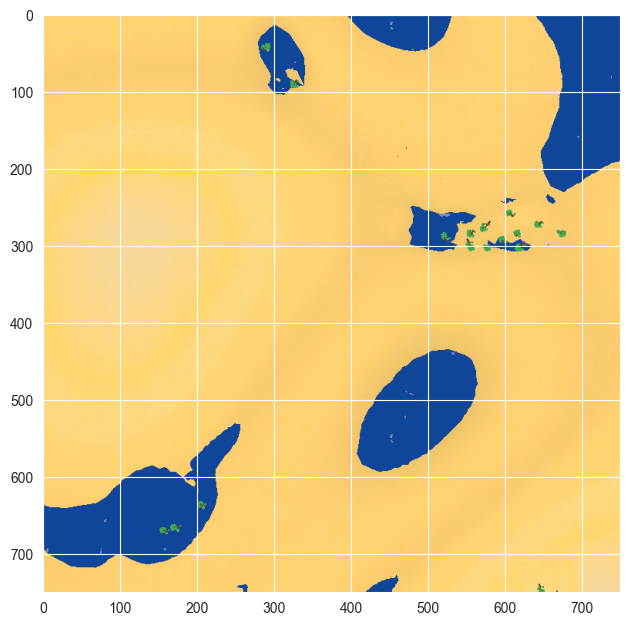

In [7]:
# Definir las dimensiones del mapa
fig,ax = plt.subplots(figsize=(7.5,7.5)) #Tamaño en pulgadas de la imagen cuando se guarde

# Guardar la imagen del mapa
img = plt.imread("images/map1.png")
ax.imshow(img)

In [8]:
for currentSession in sessions:
    for currentTest in currentSession:
        dfTest = pd.DataFrame(currentTest)
        
        # Dibujar el mapa de calor
        dfTest.plot.hexbin(fig = fig, ax = ax,x="posX", y="posZ", reduce_C_function=sum, gridsize=(50,50), extent=[0,750,0,750], alpha=0.9, cmap='Reds')
        ax.set_xticks(range(0, 800, 50))
        ax.set_yticks(range(0, 800, 50))
        fig.savefig('heatmap.png')